# Unsupervised Learning

This notebook contains code and analysis for a K-Means clustering algorithm and a small neural network both trained on the seeds dataset. All data has been previously cleaned and prepared in separate notebooks. Performance will be compared, along with that of models from the Logistic_Regression notebook.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping, History

In [2]:
# Read the data into a dataframe
seeds = pd.read_csv('seeds.csv')

# Create versions of X and y with dropped superfluous columns
X = seeds.drop(['compactness', 'class'], axis=1)
X2 = seeds.drop(['compactness', 'perimeter', 'class'], axis=1)
X3 = seeds.drop(['compactness', 'area', 'class'], axis=1)

y = seeds.loc[:,'class']

# Display the seeds dataframe
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [3]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=.2, random_state=42)

## K-means Clustering

In [19]:
# Create classifiers
kmn = KMeans(max_iter=5000)
kmn2 = KMeans(max_iter=5000)
kmn3 = KMeans(max_iter=5000)

# Fit the classifiers 
kmn.fit(X_train)
kmn2.fit(X2_train)
kmn3.fit(X3_train)

# Get cluster centers and predicted labels
cluster_centers=kmn.cluster_centers_
cluster_centers2=kmn2.cluster_centers_
cluster_centers3=kmn3.cluster_centers_

labels=kmn.labels_
labels2=kmn2.labels_
labels3=kmn3.labels_

In [5]:
# Check for accuracy directly
outcome = labels==y_train
outcome2 = labels2==y2_train
outcome3 = labels3==y3_train

print('\nPercent correct on training set:',round(sum(outcome)/len(outcome)*100, 3),'%')
print('\nPercent correct on training set 2:',round(sum(outcome2)/len(outcome2)*100, 3),'%')
print('\nPercent correct on training set 3:',round(sum(outcome3)/len(outcome3)*100, 3),'%')


Percent correct on training set: 0.0 %

Percent correct on training set 2: 9.524 %

Percent correct on training set 3: 14.881 %


In [6]:
# Predict on the test set
prediction = kmn.predict(X_test)
prediction2 = kmn2.predict(X2_test)
prediction3 = kmn3.predict(X3_test)

# Check for accuracy directly
outcome = prediction==y_test
outcome2 = prediction2==y2_test
outcome3 = prediction3==y3_test
print('\nPercent correct on test set:',round(sum(outcome)/len(outcome)*100, 3),'%')
print('\nPercent correct on test set 2:',round(sum(outcome2)/len(outcome2)*100, 3),'%')
print('\nPercent correct on test set 3:',round(sum(outcome3)/len(outcome3)*100, 3),'%')


Percent correct on test set: 0.0 %

Percent correct on test set 2: 9.524 %

Percent correct on test set 3: 2.381 %


The K-means classifier does not perform as well as logistic regression or even naive Bayes models. Even with highly correlated features removed, the model performs poorly. This is likely due to the limited data size paired with a train_test_split that may include the outliers in the test set. It would be very difficult to correctly classify seeds whose geometric profiles overlap. The supervised k-nearest-neighbors model provides better results.

## Neural Network

In [4]:
# Specify parameters
num_nodes = len(X_train.columns)*2
num_epochs = 1000
stop_pat = 25
out_nodes = 4

# Create the model
nn = Sequential()
nn2 = Sequential()
nn3 = Sequential()

# Specify the input dimension
in_dim = len(X_train.columns)
in2_dim = len(X2_train.columns)
in3_dim = len(X3_train.columns)

# Add layers to the models
nn.add(Dense(num_nodes, activation='relu', input_dim=in_dim))
nn.add(Dense(num_nodes, activation='relu'))
nn.add(Dense(num_nodes, activation='relu'))

nn2.add(Dense(num_nodes, activation='relu', input_dim=in2_dim))
nn2.add(Dense(num_nodes, activation='relu'))
nn2.add(Dense(num_nodes, activation='relu'))

nn3.add(Dense(num_nodes, activation='relu', input_dim=in3_dim))
nn3.add(Dense(num_nodes, activation='relu'))
nn3.add(Dense(num_nodes, activation='relu'))

# Add the output layer
nn.add(Dense(out_nodes, activation = 'softmax'))
nn2.add(Dense(out_nodes, activation = 'softmax'))
nn3.add(Dense(out_nodes, activation = 'softmax'))

# Compile the models
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=stop_pat)

In [5]:
# Fit the models to the training data
nn_fit = nn.fit(X_train, y_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X_test, y_test), verbose=1)
nn2_fit = nn2.fit(X2_train, y2_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X2_test, y2_test), verbose=1)
nn3_fit = nn3.fit(X3_train, y3_train, epochs=num_epochs, validation_split=.3, callbacks=[early_stopping_monitor], 
                validation_data=(X3_test, y3_test), verbose=1)

Epoch 1/1000
4/4 [==============================] - 1s 346ms/step - loss: 1.5237 - accuracy: 0.3419 - val_loss: 1.3608 - val_accuracy: 0.3922
Epoch 2/1000
4/4 [==============================] - 0s 38ms/step - loss: 1.4008 - accuracy: 0.3761 - val_loss: 1.2732 - val_accuracy: 0.4902
Epoch 3/1000
4/4 [==============================] - 0s 34ms/step - loss: 1.3198 - accuracy: 0.4701 - val_loss: 1.2175 - val_accuracy: 0.5490
Epoch 4/1000
4/4 [==============================] - 0s 33ms/step - loss: 1.2426 - accuracy: 0.5641 - val_loss: 1.1848 - val_accuracy: 0.6667
Epoch 5/1000
4/4 [==============================] - 0s 31ms/step - loss: 1.2037 - accuracy: 0.6068 - val_loss: 1.1637 - val_accuracy: 0.6667
Epoch 6/1000
4/4 [==============================] - 0s 30ms/step - loss: 1.1801 - accuracy: 0.5470 - val_loss: 1.1441 - val_accuracy: 0.6667
Epoch 7/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.1509 - accuracy: 0.5812 - val_loss: 1.1157 - val_accuracy: 0.6863
Epoch 8/1000

Epoch 59/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.4754 - accuracy: 0.9231 - val_loss: 0.4323 - val_accuracy: 0.8824
Epoch 60/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.4664 - accuracy: 0.9231 - val_loss: 0.4233 - val_accuracy: 0.8627
Epoch 61/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4623 - accuracy: 0.8889 - val_loss: 0.4161 - val_accuracy: 0.8627
Epoch 62/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.4525 - accuracy: 0.9060 - val_loss: 0.4105 - val_accuracy: 0.8824
Epoch 63/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.4484 - accuracy: 0.9231 - val_loss: 0.4068 - val_accuracy: 0.8824
Epoch 64/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.4406 - accuracy: 0.9316 - val_loss: 0.3990 - val_accuracy: 0.9020
Epoch 65/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.4349 - accuracy: 0.9060 - val_loss: 0.3922 - val_accuracy: 0.9020
Epoch 

4/4 [==============================] - 0s 22ms/step - loss: 0.2579 - accuracy: 0.9316 - val_loss: 0.2290 - val_accuracy: 0.9020
Epoch 117/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2525 - accuracy: 0.9316 - val_loss: 0.2244 - val_accuracy: 0.9412
Epoch 118/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2612 - accuracy: 0.9145 - val_loss: 0.2234 - val_accuracy: 0.9412
Epoch 119/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2499 - accuracy: 0.9316 - val_loss: 0.2322 - val_accuracy: 0.9216
Epoch 120/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2512 - accuracy: 0.9231 - val_loss: 0.2302 - val_accuracy: 0.9412
Epoch 121/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2480 - accuracy: 0.9316 - val_loss: 0.2204 - val_accuracy: 0.9020
Epoch 122/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2475 - accuracy: 0.9316 - val_loss: 0.2182 - val_accuracy: 0.9020
Epoch 123/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.2032 - accuracy: 0.9231 - val_loss: 0.1877 - val_accuracy: 0.9216
Epoch 174/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2027 - accuracy: 0.9316 - val_loss: 0.1828 - val_accuracy: 0.9216
Epoch 175/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2056 - accuracy: 0.9145 - val_loss: 0.1838 - val_accuracy: 0.9216
Epoch 176/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2023 - accuracy: 0.9231 - val_loss: 0.1837 - val_accuracy: 0.9216
Epoch 177/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2028 - accuracy: 0.9145 - val_loss: 0.1863 - val_accuracy: 0.9216
Epoch 178/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.1990 - accuracy: 0.9145 - val_loss: 0.1815 - val_accuracy: 0.9216
Epoch 179/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2007 - accuracy: 0.9145 - val_loss: 0.1857 - val_accuracy: 0.9216
Epoch 180/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.1517 - accuracy: 0.9402 - val_loss: 0.1472 - val_accuracy: 0.9216
Epoch 1/1000
4/4 [==============================] - 1s 189ms/step - loss: 2.8557 - accuracy: 0.0000e+00 - val_loss: 2.4154 - val_accuracy: 0.0000e+00
Epoch 2/1000
4/4 [==============================] - 0s 25ms/step - loss: 2.4104 - accuracy: 0.2051 - val_loss: 2.0850 - val_accuracy: 0.3137
Epoch 3/1000
4/4 [==============================] - 0s 27ms/step - loss: 2.1075 - accuracy: 0.3077 - val_loss: 1.8495 - val_accuracy: 0.3333
Epoch 4/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.8761 - accuracy: 0.2222 - val_loss: 1.6895 - val_accuracy: 0.2157
Epoch 5/1000
4/4 [==============================] - 0s 29ms/step - loss: 1.7279 - accuracy: 0.1111 - val_loss: 1.5782 - val_accuracy: 0.0980
Epoch 6/1000
4/4 [==============================] - 0s 25ms/step - loss: 1.6179 - accuracy: 0.0684 - val_loss: 1.5096 - val_accuracy: 0.0588
Epoch 7/1000
4/4 

Epoch 58/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6775 - accuracy: 0.7436 - val_loss: 0.6663 - val_accuracy: 0.7255
Epoch 59/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.6714 - accuracy: 0.7179 - val_loss: 0.6621 - val_accuracy: 0.7255
Epoch 60/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6661 - accuracy: 0.7265 - val_loss: 0.6554 - val_accuracy: 0.7255
Epoch 61/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6610 - accuracy: 0.7265 - val_loss: 0.6518 - val_accuracy: 0.7059
Epoch 62/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.6543 - accuracy: 0.7436 - val_loss: 0.6461 - val_accuracy: 0.7255
Epoch 63/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6490 - accuracy: 0.7265 - val_loss: 0.6419 - val_accuracy: 0.7059
Epoch 64/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.6451 - accuracy: 0.7265 - val_loss: 0.6355 - val_accuracy: 0.7255
Epoch 

4/4 [==============================] - 0s 27ms/step - loss: 0.4686 - accuracy: 0.8376 - val_loss: 0.4558 - val_accuracy: 0.7843
Epoch 116/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.4650 - accuracy: 0.8291 - val_loss: 0.4532 - val_accuracy: 0.8235
Epoch 117/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.4615 - accuracy: 0.8462 - val_loss: 0.4492 - val_accuracy: 0.8235
Epoch 118/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.4581 - accuracy: 0.8291 - val_loss: 0.4459 - val_accuracy: 0.8235
Epoch 119/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.4551 - accuracy: 0.8205 - val_loss: 0.4420 - val_accuracy: 0.8235
Epoch 120/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.4515 - accuracy: 0.8291 - val_loss: 0.4378 - val_accuracy: 0.8039
Epoch 121/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.4484 - accuracy: 0.8547 - val_loss: 0.4346 - val_accuracy: 0.8235
Epoch 122/1000

4/4 [==============================] - 0s 20ms/step - loss: 0.3509 - accuracy: 0.8632 - val_loss: 0.3080 - val_accuracy: 0.9020
Epoch 173/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3424 - accuracy: 0.8803 - val_loss: 0.3156 - val_accuracy: 0.9216
Epoch 174/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3443 - accuracy: 0.8803 - val_loss: 0.3079 - val_accuracy: 0.9216
Epoch 175/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3376 - accuracy: 0.8803 - val_loss: 0.3060 - val_accuracy: 0.8627
Epoch 176/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.3404 - accuracy: 0.8889 - val_loss: 0.3023 - val_accuracy: 0.9020
Epoch 177/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3344 - accuracy: 0.8803 - val_loss: 0.3063 - val_accuracy: 0.9216
Epoch 178/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3395 - accuracy: 0.8803 - val_loss: 0.3006 - val_accuracy: 0.9020
Epoch 179/1000

4/4 [==============================] - 0s 45ms/step - loss: 0.2913 - accuracy: 0.8889 - val_loss: 0.2445 - val_accuracy: 0.9216
Epoch 230/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.2936 - accuracy: 0.8974 - val_loss: 0.2443 - val_accuracy: 0.9020
Epoch 231/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2963 - accuracy: 0.8803 - val_loss: 0.2471 - val_accuracy: 0.9216
Epoch 232/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2918 - accuracy: 0.8803 - val_loss: 0.2452 - val_accuracy: 0.9216
Epoch 233/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.2911 - accuracy: 0.8803 - val_loss: 0.2437 - val_accuracy: 0.9216
Epoch 234/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2938 - accuracy: 0.8803 - val_loss: 0.2446 - val_accuracy: 0.9216
Epoch 235/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2896 - accuracy: 0.8889 - val_loss: 0.2407 - val_accuracy: 0.9216
Epoch 236/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.2731 - accuracy: 0.8889 - val_loss: 0.2246 - val_accuracy: 0.9216
Epoch 287/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2737 - accuracy: 0.8889 - val_loss: 0.2201 - val_accuracy: 0.9216
Epoch 288/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2688 - accuracy: 0.8974 - val_loss: 0.2233 - val_accuracy: 0.9216
Epoch 289/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.2711 - accuracy: 0.8974 - val_loss: 0.2199 - val_accuracy: 0.9216
Epoch 290/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2684 - accuracy: 0.9060 - val_loss: 0.2180 - val_accuracy: 0.9216
Epoch 291/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2732 - accuracy: 0.8974 - val_loss: 0.2178 - val_accuracy: 0.9216
Epoch 292/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2685 - accuracy: 0.9145 - val_loss: 0.2234 - val_accuracy: 0.9216
Epoch 293/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.2597 - accuracy: 0.9060 - val_loss: 0.2153 - val_accuracy: 0.9216
Epoch 344/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2660 - accuracy: 0.8718 - val_loss: 0.2155 - val_accuracy: 0.9216
Epoch 345/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.2558 - accuracy: 0.9060 - val_loss: 0.2036 - val_accuracy: 0.9216
Epoch 346/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2610 - accuracy: 0.9060 - val_loss: 0.2035 - val_accuracy: 0.9412
Epoch 347/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2647 - accuracy: 0.8974 - val_loss: 0.2093 - val_accuracy: 0.9216
Epoch 348/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2574 - accuracy: 0.8974 - val_loss: 0.2051 - val_accuracy: 0.9216
Epoch 349/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2575 - accuracy: 0.9060 - val_loss: 0.2052 - val_accuracy: 0.9216
Epoch 350/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.2494 - accuracy: 0.8974 - val_loss: 0.2045 - val_accuracy: 0.9216
Epoch 401/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2502 - accuracy: 0.8974 - val_loss: 0.2018 - val_accuracy: 0.9216
Epoch 402/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2484 - accuracy: 0.8974 - val_loss: 0.1982 - val_accuracy: 0.9216
Epoch 403/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2505 - accuracy: 0.9060 - val_loss: 0.1971 - val_accuracy: 0.9412
Epoch 404/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2515 - accuracy: 0.9060 - val_loss: 0.2014 - val_accuracy: 0.9216
Epoch 405/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2486 - accuracy: 0.8974 - val_loss: 0.1990 - val_accuracy: 0.9216
Epoch 406/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2488 - accuracy: 0.8974 - val_loss: 0.1972 - val_accuracy: 0.9216
Epoch 407/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.2439 - accuracy: 0.9060 - val_loss: 0.1952 - val_accuracy: 0.9216
Epoch 458/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2421 - accuracy: 0.8974 - val_loss: 0.2021 - val_accuracy: 0.9216
Epoch 459/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.2449 - accuracy: 0.9060 - val_loss: 0.1990 - val_accuracy: 0.9216
Epoch 460/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.2486 - accuracy: 0.9145 - val_loss: 0.1917 - val_accuracy: 0.9412
Epoch 461/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.2424 - accuracy: 0.9060 - val_loss: 0.1946 - val_accuracy: 0.9412
Epoch 462/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.2449 - accuracy: 0.9060 - val_loss: 0.1968 - val_accuracy: 0.9216
Epoch 463/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.2442 - accuracy: 0.9145 - val_loss: 0.1899 - val_accuracy: 0.9412
Epoch 464/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.2347 - accuracy: 0.9231 - val_loss: 0.1784 - val_accuracy: 0.9412
Epoch 515/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2306 - accuracy: 0.9231 - val_loss: 0.1792 - val_accuracy: 0.9412
Epoch 516/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2362 - accuracy: 0.9145 - val_loss: 0.1814 - val_accuracy: 0.9412
Epoch 517/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2288 - accuracy: 0.9145 - val_loss: 0.1775 - val_accuracy: 0.9412
Epoch 518/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2310 - accuracy: 0.9231 - val_loss: 0.1785 - val_accuracy: 0.9412
Epoch 519/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2289 - accuracy: 0.9145 - val_loss: 0.1828 - val_accuracy: 0.9412
Epoch 520/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2301 - accuracy: 0.9060 - val_loss: 0.1836 - val_accuracy: 0.9412
Epoch 521/1000

4/4 [==============================] - 0s 24ms/step - loss: 0.8664 - accuracy: 0.5299 - val_loss: 0.8994 - val_accuracy: 0.5098
Epoch 30/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.8592 - accuracy: 0.5299 - val_loss: 0.8924 - val_accuracy: 0.5098
Epoch 31/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.8552 - accuracy: 0.5214 - val_loss: 0.8848 - val_accuracy: 0.5098
Epoch 32/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.8506 - accuracy: 0.5214 - val_loss: 0.8772 - val_accuracy: 0.5098
Epoch 33/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.8428 - accuracy: 0.5556 - val_loss: 0.8750 - val_accuracy: 0.5294
Epoch 34/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.8397 - accuracy: 0.5812 - val_loss: 0.8740 - val_accuracy: 0.5882
Epoch 35/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.8343 - accuracy: 0.6325 - val_loss: 0.8683 - val_accuracy: 0.5686
Epoch 36/1000
4/4 [=

Epoch 87/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.7142 - accuracy: 0.7094 - val_loss: 0.7122 - val_accuracy: 0.7255
Epoch 88/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.7136 - accuracy: 0.7094 - val_loss: 0.7135 - val_accuracy: 0.7059
Epoch 89/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.7144 - accuracy: 0.7265 - val_loss: 0.7144 - val_accuracy: 0.7059
Epoch 90/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.7138 - accuracy: 0.7094 - val_loss: 0.7123 - val_accuracy: 0.7059
Epoch 91/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.7086 - accuracy: 0.7179 - val_loss: 0.7027 - val_accuracy: 0.7059
Epoch 92/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.7098 - accuracy: 0.7009 - val_loss: 0.6974 - val_accuracy: 0.7255
Epoch 93/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.7114 - accuracy: 0.6667 - val_loss: 0.6967 - val_accuracy: 0.7059
Epoch 

4/4 [==============================] - 0s 13ms/step - loss: 0.6446 - accuracy: 0.7692 - val_loss: 0.6377 - val_accuracy: 0.7647
Epoch 145/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.6436 - accuracy: 0.7692 - val_loss: 0.6352 - val_accuracy: 0.7647
Epoch 146/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.6393 - accuracy: 0.7436 - val_loss: 0.6370 - val_accuracy: 0.8039
Epoch 147/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6409 - accuracy: 0.7607 - val_loss: 0.6373 - val_accuracy: 0.7647
Epoch 148/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.6420 - accuracy: 0.7350 - val_loss: 0.6381 - val_accuracy: 0.7647
Epoch 149/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.6354 - accuracy: 0.7265 - val_loss: 0.6291 - val_accuracy: 0.7451
Epoch 150/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.6392 - accuracy: 0.7521 - val_loss: 0.6297 - val_accuracy: 0.7843
Epoch 151/1000


4/4 [==============================] - 0s 26ms/step - loss: 0.5768 - accuracy: 0.8034 - val_loss: 0.5765 - val_accuracy: 0.7843
Epoch 202/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.5762 - accuracy: 0.7607 - val_loss: 0.5749 - val_accuracy: 0.7647
Epoch 203/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.5724 - accuracy: 0.7863 - val_loss: 0.5738 - val_accuracy: 0.7843
Epoch 204/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.5724 - accuracy: 0.8034 - val_loss: 0.5765 - val_accuracy: 0.7843
Epoch 205/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.5710 - accuracy: 0.8376 - val_loss: 0.5739 - val_accuracy: 0.7843
Epoch 206/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.5716 - accuracy: 0.7778 - val_loss: 0.5692 - val_accuracy: 0.7843
Epoch 207/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.5671 - accuracy: 0.7778 - val_loss: 0.5709 - val_accuracy: 0.7647
Epoch 208/1000

4/4 [==============================] - 0s 24ms/step - loss: 0.5299 - accuracy: 0.7949 - val_loss: 0.5400 - val_accuracy: 0.7843
Epoch 259/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.5236 - accuracy: 0.8034 - val_loss: 0.5244 - val_accuracy: 0.8039
Epoch 260/1000
4/4 [==============================] - 0s 48ms/step - loss: 0.5203 - accuracy: 0.7863 - val_loss: 0.5237 - val_accuracy: 0.8039
Epoch 261/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.5189 - accuracy: 0.7863 - val_loss: 0.5278 - val_accuracy: 0.7843
Epoch 262/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.5162 - accuracy: 0.8120 - val_loss: 0.5246 - val_accuracy: 0.7843
Epoch 263/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.5176 - accuracy: 0.8205 - val_loss: 0.5231 - val_accuracy: 0.8235
Epoch 264/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.5177 - accuracy: 0.8034 - val_loss: 0.5235 - val_accuracy: 0.7843
Epoch 265/1000

4/4 [==============================] - 0s 21ms/step - loss: 0.4763 - accuracy: 0.8120 - val_loss: 0.4855 - val_accuracy: 0.8235
Epoch 316/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.4797 - accuracy: 0.8034 - val_loss: 0.4825 - val_accuracy: 0.8235
Epoch 317/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4762 - accuracy: 0.7949 - val_loss: 0.4825 - val_accuracy: 0.8235
Epoch 318/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.4741 - accuracy: 0.8120 - val_loss: 0.4811 - val_accuracy: 0.8235
Epoch 319/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4797 - accuracy: 0.8291 - val_loss: 0.4826 - val_accuracy: 0.7843
Epoch 320/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.4737 - accuracy: 0.8120 - val_loss: 0.4790 - val_accuracy: 0.8235
Epoch 321/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.4702 - accuracy: 0.8291 - val_loss: 0.4792 - val_accuracy: 0.8235
Epoch 322/1000

4/4 [==============================] - 0s 17ms/step - loss: 0.4326 - accuracy: 0.8462 - val_loss: 0.4445 - val_accuracy: 0.8627
Epoch 373/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.4371 - accuracy: 0.8547 - val_loss: 0.4455 - val_accuracy: 0.8431
Epoch 374/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.4361 - accuracy: 0.8376 - val_loss: 0.4436 - val_accuracy: 0.8431
Epoch 375/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4340 - accuracy: 0.8034 - val_loss: 0.4425 - val_accuracy: 0.8431
Epoch 376/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.4351 - accuracy: 0.8632 - val_loss: 0.4506 - val_accuracy: 0.8235
Epoch 377/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.4363 - accuracy: 0.8632 - val_loss: 0.4434 - val_accuracy: 0.8627
Epoch 378/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.4342 - accuracy: 0.8376 - val_loss: 0.4409 - val_accuracy: 0.8431
Epoch 379/1000


4/4 [==============================] - 0s 27ms/step - loss: 0.4167 - accuracy: 0.8205 - val_loss: 0.4138 - val_accuracy: 0.8627
Epoch 430/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.4049 - accuracy: 0.8718 - val_loss: 0.4108 - val_accuracy: 0.8431
Epoch 431/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3948 - accuracy: 0.8974 - val_loss: 0.4032 - val_accuracy: 0.8824
Epoch 432/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.3963 - accuracy: 0.8718 - val_loss: 0.4088 - val_accuracy: 0.8431
Epoch 433/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.4005 - accuracy: 0.8718 - val_loss: 0.4011 - val_accuracy: 0.8627
Epoch 434/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.3910 - accuracy: 0.8974 - val_loss: 0.4004 - val_accuracy: 0.8824
Epoch 435/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3909 - accuracy: 0.8718 - val_loss: 0.4032 - val_accuracy: 0.8627
Epoch 436/1000

4/4 [==============================] - 0s 25ms/step - loss: 0.3574 - accuracy: 0.9060 - val_loss: 0.3644 - val_accuracy: 0.8627
Epoch 487/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.3680 - accuracy: 0.8889 - val_loss: 0.3700 - val_accuracy: 0.8627
Epoch 488/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.3534 - accuracy: 0.9145 - val_loss: 0.3668 - val_accuracy: 0.8824
Epoch 489/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.3659 - accuracy: 0.8889 - val_loss: 0.3729 - val_accuracy: 0.8627
Epoch 490/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.3554 - accuracy: 0.8974 - val_loss: 0.3648 - val_accuracy: 0.8824
Epoch 491/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.3509 - accuracy: 0.9060 - val_loss: 0.3608 - val_accuracy: 0.8627
Epoch 492/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.3532 - accuracy: 0.9231 - val_loss: 0.3606 - val_accuracy: 0.8627
Epoch 493/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.3186 - accuracy: 0.9402 - val_loss: 0.3313 - val_accuracy: 0.8627
Epoch 544/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.3161 - accuracy: 0.9316 - val_loss: 0.3236 - val_accuracy: 0.8824
Epoch 545/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.3160 - accuracy: 0.9316 - val_loss: 0.3221 - val_accuracy: 0.8824
Epoch 546/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.3150 - accuracy: 0.9402 - val_loss: 0.3254 - val_accuracy: 0.8824
Epoch 547/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3143 - accuracy: 0.9316 - val_loss: 0.3271 - val_accuracy: 0.8627
Epoch 548/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.3198 - accuracy: 0.9231 - val_loss: 0.3233 - val_accuracy: 0.8824
Epoch 549/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.3147 - accuracy: 0.9316 - val_loss: 0.3214 - val_accuracy: 0.8824
Epoch 550/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.2894 - accuracy: 0.9402 - val_loss: 0.2922 - val_accuracy: 0.8824
Epoch 601/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.2824 - accuracy: 0.9487 - val_loss: 0.2873 - val_accuracy: 0.8824
Epoch 602/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.2943 - accuracy: 0.9316 - val_loss: 0.2852 - val_accuracy: 0.8824
Epoch 603/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2915 - accuracy: 0.9316 - val_loss: 0.3005 - val_accuracy: 0.8824
Epoch 604/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2888 - accuracy: 0.9231 - val_loss: 0.2888 - val_accuracy: 0.8824
Epoch 605/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.2831 - accuracy: 0.9402 - val_loss: 0.2840 - val_accuracy: 0.8824
Epoch 606/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.2817 - accuracy: 0.9402 - val_loss: 0.2853 - val_accuracy: 0.8824
Epoch 607/1000

4/4 [==============================] - 0s 19ms/step - loss: 0.2559 - accuracy: 0.9402 - val_loss: 0.2564 - val_accuracy: 0.8824
Epoch 658/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2583 - accuracy: 0.9402 - val_loss: 0.2560 - val_accuracy: 0.9020
Epoch 659/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.2560 - accuracy: 0.9487 - val_loss: 0.2567 - val_accuracy: 0.9020
Epoch 660/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.2610 - accuracy: 0.9487 - val_loss: 0.2601 - val_accuracy: 0.9020
Epoch 661/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2528 - accuracy: 0.9402 - val_loss: 0.2591 - val_accuracy: 0.9020
Epoch 662/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2622 - accuracy: 0.9402 - val_loss: 0.2652 - val_accuracy: 0.9020
Epoch 663/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.2591 - accuracy: 0.9573 - val_loss: 0.2583 - val_accuracy: 0.8824
Epoch 664/1000

4/4 [==============================] - 0s 14ms/step - loss: 0.2385 - accuracy: 0.9402 - val_loss: 0.2389 - val_accuracy: 0.9216
Epoch 715/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2362 - accuracy: 0.9487 - val_loss: 0.2301 - val_accuracy: 0.9020
Epoch 716/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2471 - accuracy: 0.9402 - val_loss: 0.2284 - val_accuracy: 0.8824
Epoch 717/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2320 - accuracy: 0.9573 - val_loss: 0.2544 - val_accuracy: 0.9020
Epoch 718/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2438 - accuracy: 0.9487 - val_loss: 0.2457 - val_accuracy: 0.9216
Epoch 719/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2452 - accuracy: 0.9487 - val_loss: 0.2296 - val_accuracy: 0.9020
Epoch 720/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2371 - accuracy: 0.9487 - val_loss: 0.2336 - val_accuracy: 0.9020
Epoch 721/1000

4/4 [==============================] - 0s 26ms/step - loss: 0.2171 - accuracy: 0.9487 - val_loss: 0.2101 - val_accuracy: 0.9020
Epoch 772/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.2255 - accuracy: 0.9487 - val_loss: 0.2047 - val_accuracy: 0.9216
Epoch 773/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.2232 - accuracy: 0.9402 - val_loss: 0.2221 - val_accuracy: 0.9216
Epoch 774/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2160 - accuracy: 0.9573 - val_loss: 0.2155 - val_accuracy: 0.9020
Epoch 775/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.2362 - accuracy: 0.9402 - val_loss: 0.2101 - val_accuracy: 0.9216
Epoch 776/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.2153 - accuracy: 0.9573 - val_loss: 0.2269 - val_accuracy: 0.9216
Epoch 777/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.2218 - accuracy: 0.9487 - val_loss: 0.2079 - val_accuracy: 0.9216
Epoch 778/1000

4/4 [==============================] - 0s 13ms/step - loss: 0.2013 - accuracy: 0.9487 - val_loss: 0.2037 - val_accuracy: 0.9020
Epoch 829/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2009 - accuracy: 0.9573 - val_loss: 0.1976 - val_accuracy: 0.9216
Epoch 830/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.2005 - accuracy: 0.9487 - val_loss: 0.1886 - val_accuracy: 0.9412
Epoch 831/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2119 - accuracy: 0.9573 - val_loss: 0.1857 - val_accuracy: 0.9608
Epoch 832/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2058 - accuracy: 0.9487 - val_loss: 0.2160 - val_accuracy: 0.9216
Epoch 833/1000
4/4 [==============================] - 0s 11ms/step - loss: 0.2044 - accuracy: 0.9573 - val_loss: 0.1939 - val_accuracy: 0.9412
Epoch 834/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.2037 - accuracy: 0.9487 - val_loss: 0.1894 - val_accuracy: 0.9216
Epoch 835/1000


4/4 [==============================] - 0s 9ms/step - loss: 0.1873 - accuracy: 0.9487 - val_loss: 0.1824 - val_accuracy: 0.9412
Epoch 886/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1905 - accuracy: 0.9487 - val_loss: 0.1757 - val_accuracy: 0.9608
Epoch 887/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1903 - accuracy: 0.9487 - val_loss: 0.1810 - val_accuracy: 0.9608
Epoch 888/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1934 - accuracy: 0.9487 - val_loss: 0.1974 - val_accuracy: 0.9216
Epoch 889/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1898 - accuracy: 0.9487 - val_loss: 0.1750 - val_accuracy: 0.9216
Epoch 890/1000
4/4 [==============================] - 0s 8ms/step - loss: 0.1872 - accuracy: 0.9487 - val_loss: 0.1792 - val_accuracy: 0.9412
Epoch 891/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.1864 - accuracy: 0.9658 - val_loss: 0.1889 - val_accuracy: 0.9216
Epoch 892/1000
4/4 [=

4/4 [==============================] - 0s 23ms/step - loss: 0.1747 - accuracy: 0.9573 - val_loss: 0.1724 - val_accuracy: 0.9412
Epoch 943/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.1772 - accuracy: 0.9487 - val_loss: 0.1682 - val_accuracy: 0.9608
Epoch 944/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.1769 - accuracy: 0.9487 - val_loss: 0.1679 - val_accuracy: 0.9412
Epoch 945/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.1756 - accuracy: 0.9573 - val_loss: 0.1733 - val_accuracy: 0.9608
Epoch 946/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1772 - accuracy: 0.9487 - val_loss: 0.1676 - val_accuracy: 0.9608
Epoch 947/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1775 - accuracy: 0.9487 - val_loss: 0.1613 - val_accuracy: 0.9412
Epoch 948/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1780 - accuracy: 0.9487 - val_loss: 0.1674 - val_accuracy: 0.9608
Epoch 949/1000

4/4 [==============================] - 0s 10ms/step - loss: 0.1694 - accuracy: 0.9573 - val_loss: 0.1501 - val_accuracy: 0.9608
Epoch 1000/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.1672 - accuracy: 0.9573 - val_loss: 0.1548 - val_accuracy: 0.9608


In [33]:
# Make predictions on the test sets
pred1 = nn.predict(X_test)
pred2 = nn2.predict(X2_test)
pred3 = nn3.predict(X3_test)

In [7]:
# Score the models' performance
score = nn.evaluate(X_test, y_test)
score2 = nn2.evaluate(X2_test, y2_test)
score3 = nn3.evaluate(X3_test, y3_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.9524


In [8]:
# Get the scores
loss, accuracy = score
loss2, accuracy2 = score2
loss3, accuracy3 = score3

print('\nTest loss:', round(loss,4), '   Test accuracy:', round(accuracy,4)*100,'%')
print('\nTest2 loss:', round(loss2,4), '   Test2 accuracy:', round(accuracy2,4)*100,'%')
print('\nTest3 loss:', round(loss3,4), '   Test3 accuracy:', round(accuracy3,4)*100,'%')


Test loss: 0.2347    Test accuracy: 85.71 %

Test2 loss: 0.3182    Test2 accuracy: 85.71 %

Test3 loss: 0.1946    Test3 accuracy: 95.24000000000001 %


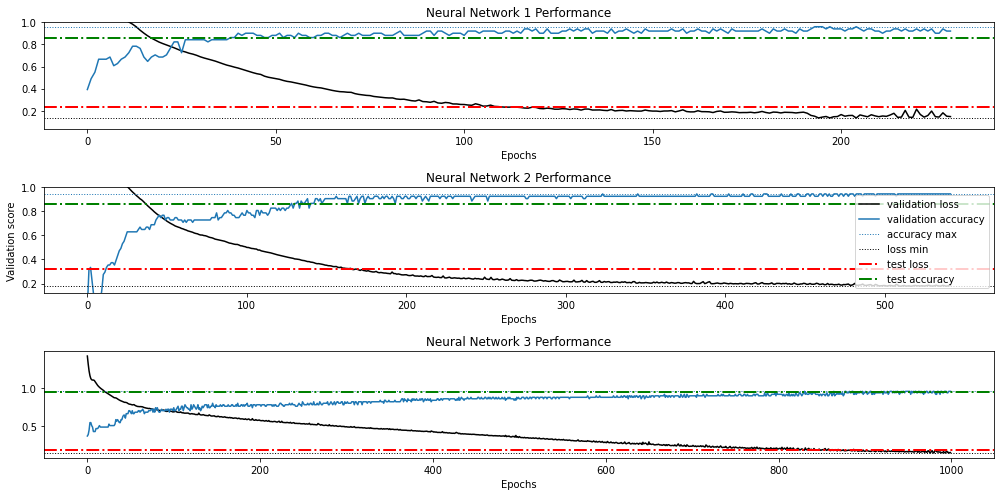

In [9]:
# Create plots
_=plt.figure(figsize=(14,7))
_=plt.subplot(3,1,1)
_=plt.title('Neural Network 1 Performance')
_=plt.plot(nn_fit.history['val_loss'], 'k')
_=plt.plot(nn_fit.history['val_accuracy'])
_=plt.ylim(loss-.2,1)
_=plt.axhline(max(nn_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')

_=plt.subplot(3,1,2)
_=plt.title('Neural Network 2 Performance')
_=plt.plot(nn2_fit.history['val_loss'], 'k')
_=plt.plot(nn2_fit.history['val_accuracy'])
_=plt.ylim(loss2-.2,1)
_=plt.axhline(max(nn2_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn2_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss2, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy2, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')
_=plt.ylabel('Validation score')
_=plt.legend(['validation loss','validation accuracy', 'accuracy max', 'loss min', 'test loss', 'test accuracy'])

_=plt.subplot(3,1,3)
_=plt.title('Neural Network 3 Performance')
_=plt.plot(nn3_fit.history['val_loss'], 'k')
_=plt.plot(nn3_fit.history['val_accuracy'])
#_=plt.ylim(loss3-.2,1)
_=plt.axhline(max(nn3_fit.history['val_accuracy']), linestyle=':', linewidth=1)
_=plt.axhline(min(nn3_fit.history['val_loss']), linestyle=':', linewidth=1, c='k')
_=plt.axhline(loss3, linestyle='-.', linewidth=2, c='r')
_=plt.axhline(accuracy3, linestyle='-.', linewidth=2, c='g')
_=plt.xlabel('Epochs')
_=plt.tight_layout()

plt.show()

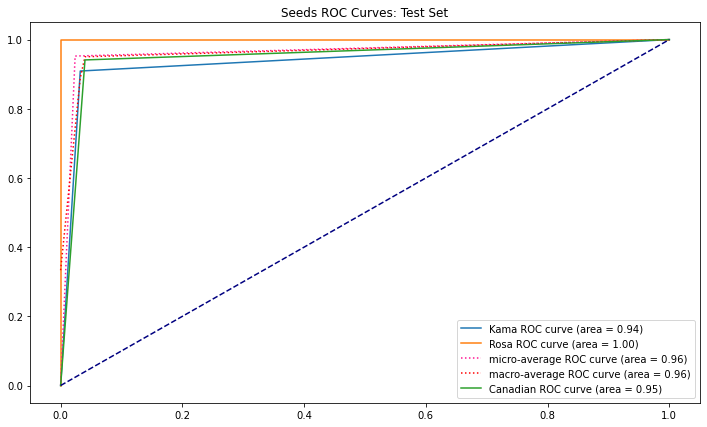

In [32]:
# Calculate the roc curve and auc score for each class
X = seeds.drop('class', axis =1)
y = seeds['class']

# Create a data frame to hold the predictions
pred3_df = pd.DataFrame(pred3)

# Convert the probabilities into class labels
pred3_classes = []
for i in range(len(pred3_df)):
    pred3_classes.append(np.argmax(pred3_df.iloc[i,:]) + 1)
pred3_classes = np.asarray(pred3_classes)

# Binarize the predicted classes
#pred1_bin = label_binarize(pred1, classes = [1, 2, 3])
#pred2_bin = label_binarize(pred2, classes = [1, 2, 3])
pred3_bin = label_binarize(pred3_classes, classes = [1, 2, 3])


# Binarize the training and test original data for comparison
#y_test_bin = label_binarize(y_test, classes = [1, 2, 3])
#y2_test_bin = label_binarize(y2_test, classes = [1, 2, 3])
y3_test_bin = label_binarize(y3_test, classes = [1, 2, 3])

# Set thenumber of classes
num_classes = y3_test_bin.shape[1]

# Loop through classes and caclulate roc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y3_test_bin[:, i], pred3_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y3_test_bin.ravel(), pred3_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the curve
plt.figure(figsize = (12, 7))
plt.plot(fpr[0], tpr[0], label = 'Kama ROC curve (area = %.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], label = 'Rosa ROC curve (area = %.2f)' % roc_auc[1])
plt.plot(fpr['micro'], tpr['micro'], label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':')
plt.plot(fpr['macro'], tpr['macro'], label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='red', linestyle=':')
plt.plot(fpr[2], tpr[2], label = 'Canadian ROC curve (area = %.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Seeds ROC Curves: Test Set')
plt.legend(loc = 'lower right')

In [34]:
# Create a confusion matrix to show misclassifications
pred3 = pred3[:, 1:]

pred3_trans = [list(pred3[i]).index(pred3[i].max()) + 1 for i in range(len(pred3))]

confusion_matrix(y3_test, pred3_trans)

array([[10,  0,  1],
       [ 0, 14,  0],
       [ 1,  0, 16]], dtype=int64)

## Conclusion



The seeds dataset, though small, is rich in information. The logistic regression model performed best, with a neural network showing similar results using features with those highly correlated removed. The next step in training the model would be to use each network in a larger inhereted neural network structure. 